Assignment 6 Malika Uteuliyeva

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Initializing original function and given nine points

In [2]:
def f(x):
    return 1/(1+25*x**2)

N=9
vals = []

for i in range(N):
    arg = -1+i*0.25
    vals.append([arg,f(arg)])

Points for interpolation

In [3]:
#points to plot
x_ip = np.arange(-1.0, 1.0, 0.01)
y_ip= [(f(i)) for i in x_ip]

Functions for Lagrange interpolation and finding errors

In [4]:
def lagrIP(data_points, points_ip):
    #length of arrays    
    n = len(data_points)
    n_ip = len(points_ip)
    
    #memory allocation
    L = [0.0]*(n_ip)
    
    #points to interpolate
    X = [i[0] for i in data_points]
    Y = [i[1] for i in data_points]
    
    for i,fi in enumerate(points_ip):
        for j in range(n):
            l=1
            for k in range(n):
                if k != j:
                    l *= (fi-X[k]) / (X[j]-X[k])
            L[i] += Y[j]*l       
    return L

def lagrPlot(data_points, order):
    n = len(data_points)
    i = 0
    low = -1.0
    L = []
    while (low < (1.0)):
        upp = low + order*0.25
        if (upp > 1.0):
            low = 1.0 - order*0.25
            upp = 1.0
            x = np.arange(upp_old, upp+0.001, 0.01)
        else:
            x = np.arange(low, upp+0.001, 0.01)
        new_x = np.arange(low, upp+0.01, 0.25)
        new_data_points = []
        
        for k in range (len(new_x)):
            x_new_data = new_x[k]
            y_new_data = f(x_new_data)
            new_data_points.append([x_new_data, y_new_data ])

        ip = lagrIP(new_data_points, x)
        L += ip
        plt.plot(x,ip)
        plt.xlabel("x")
        plt.ylabel("y")
        
        low = upp
        upp_old = upp
        
    return L

#error function (average of squared difference between true and interpolated value)
def get_error(x_ip, L):
    n = len(x_ip)
    total = 0.0
    for i in range (n):
        total += (f(x_ip[i])-L[i])**2
    return np.sqrt(total/(n-1))

Original function


Text(0,0.5,'y')

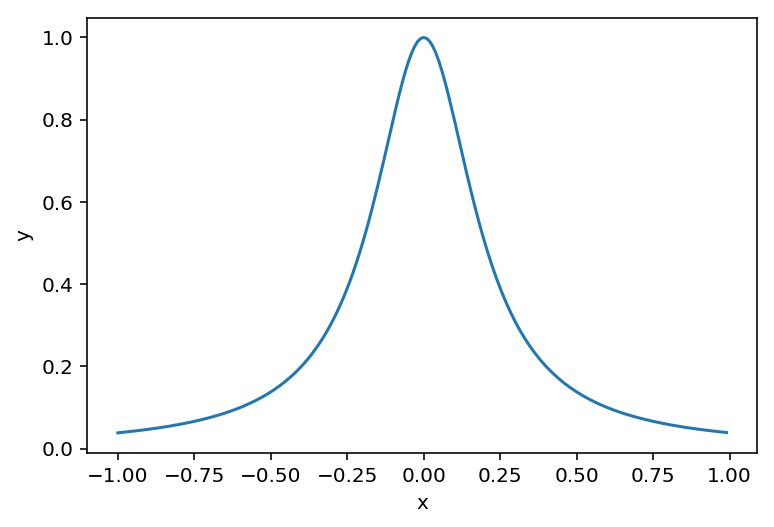

In [5]:
print("Original function")
plt.plot(x_ip,y_ip)
plt.xlabel("x")
plt.ylabel("y")

Order 1: error = 0.0543197572232


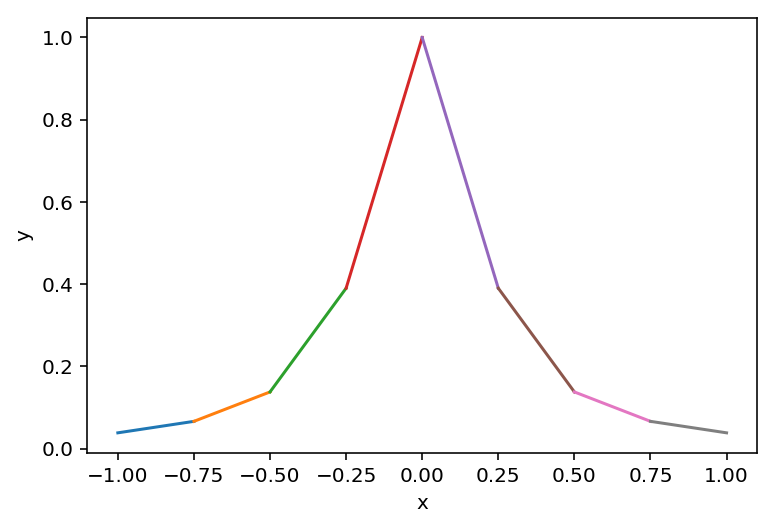

In [6]:
print("Order 1: error =", get_error(x_ip, lagrPlot(vals,1)))

Order 2: error = 0.0327268857284


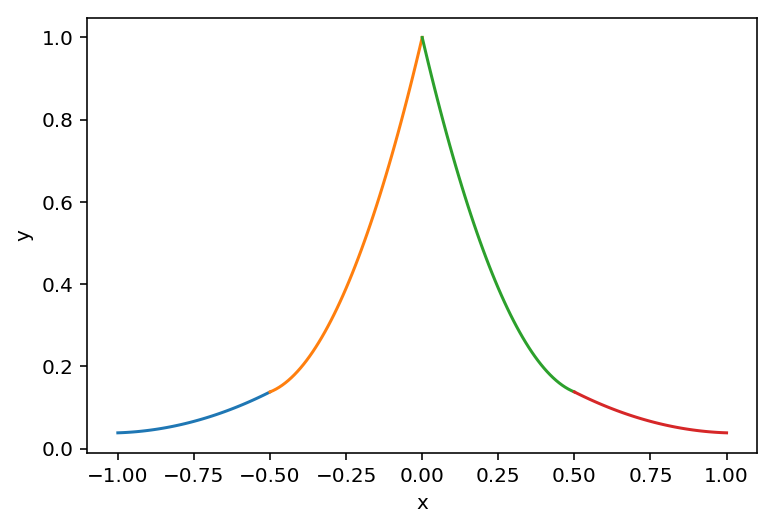

In [7]:
print("Order 2: error =", get_error(x_ip, lagrPlot(vals,2)))

Order 3: error = 0.0577723949454


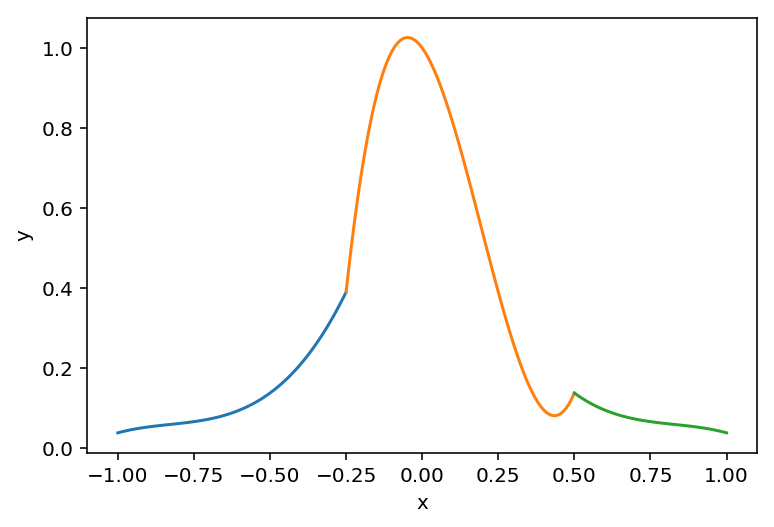

In [8]:
print("Order 3: error =", get_error(x_ip, lagrPlot(vals,3)))

Order 4: error = 0.0310655761838


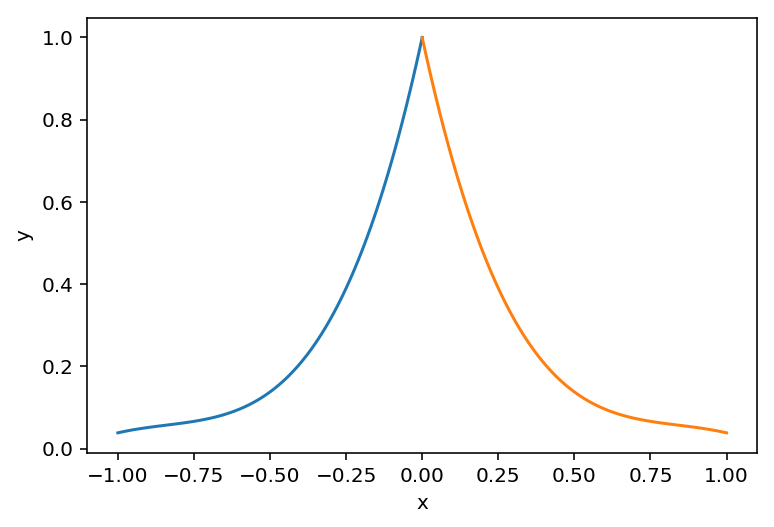

In [9]:
print("Order 4: error =", get_error(x_ip, lagrPlot(vals,4)))

Order 5: error = 0.0928538193095


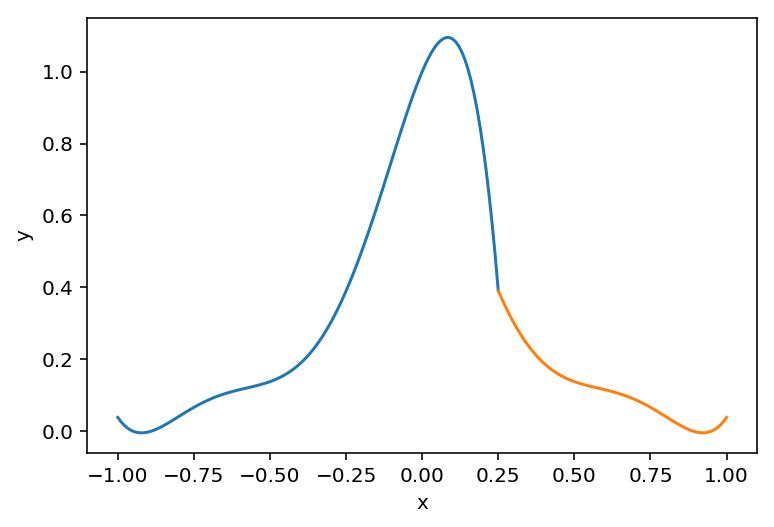

In [10]:
print("Order 5: error =", get_error(x_ip, lagrPlot(vals,5)))

Order 6: error = 0.162398756459


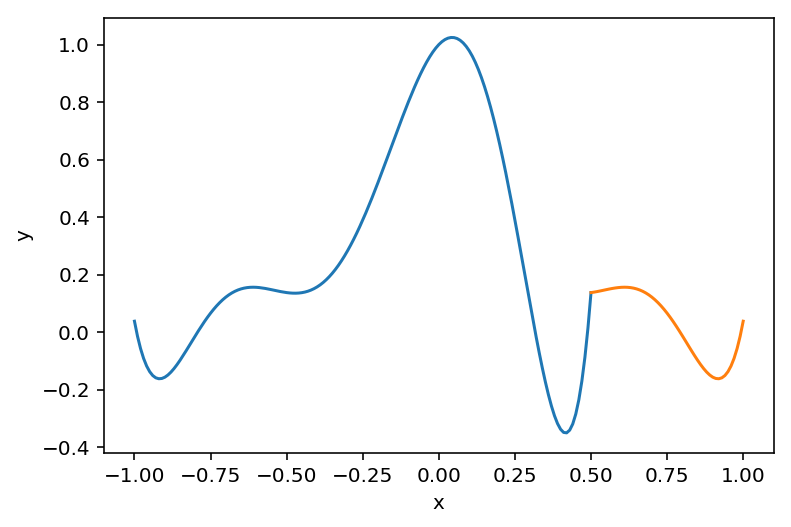

In [11]:
print("Order 6: error =", get_error(x_ip, lagrPlot(vals,6)))

Order 7: error = 0.269167308296


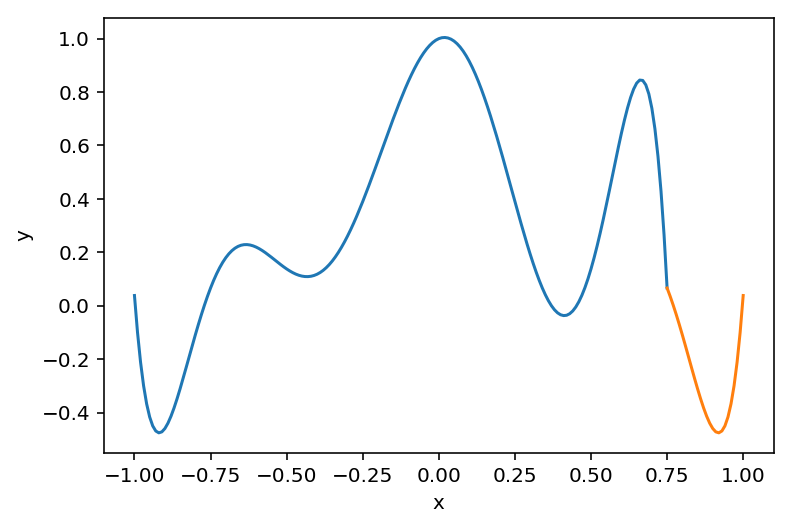

In [12]:
print("Order 7: error =", get_error(x_ip, lagrPlot(vals,7)))

Order 8: error = 0.369373342302


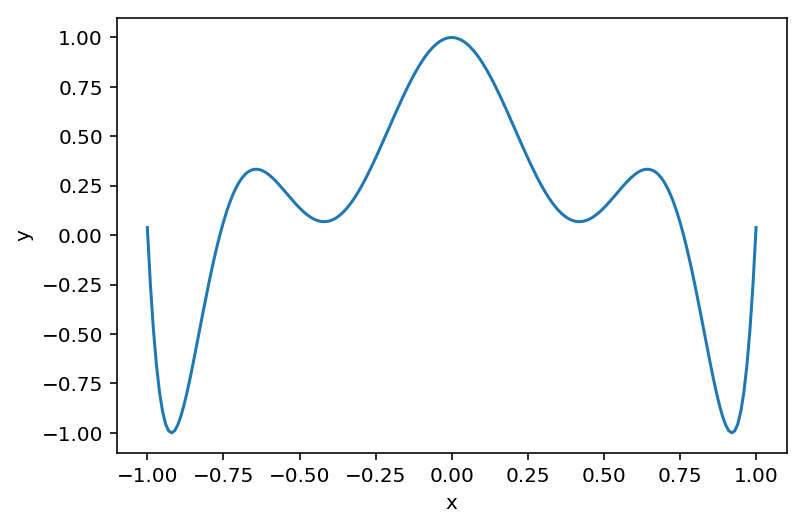

In [13]:
print("Order 8: error =", get_error(x_ip, lagrPlot(vals,8)))

Functions for cubic splines were written with the usage of textbook pseudocode

In [14]:
def splines(data_points, xs):
    
    x = [i[0] for i in data_points]
    y = [i[1] for i in data_points]
    
    n=len(x)-1
    
    e=np.zeros(n)
    f=np.zeros(n)
    g=np.zeros(n)
    r=np.zeros(n)
    X=np.zeros(n+1)
    tridiag(x,y,n,e,f,g,r)
    decomp(e,f,g,n-1)
    subst(e,f,g,r,n-1,X)
    
    return interpol(x,y,n,X,xs)

def tridiag(x,y,n,e,f,g,r):
    f[1]=2*(x[2]-x[0])
    g[1]=(x[2]-x[1])
    r[1]=6/(x[2]-x[1])*(y[2]-y[1])
    r[1]=r[1]+6/(x[1]-x[0])*(y[0]-y[1])
    for i in range(2,n-1):
        e[i]=x[i]-x[i-1]
        f[i]=2*(x[i+1]-x[i-1])
        g[i]=x[i+1]-x[i]
        r[i]=6/(x[i+1]-x[i])*(y[i+1]-y[i])
        r[i]=r[i]+6/(x[i]-x[i-1])*(y[i-1]-y[i])
    e[n-1]=x[n-1]-x[n-2]
    f[n-1]=2*(x[n]-x[n-2])
    r[n-1]=6/(x[n]-x[n-1])*(y[n]-y[n-1])
    r[n-1]=r[n-1]+6/(x[n-1]-x[n-2])*(y[n-2]-y[n-1])
    return e,f,g,r
    
def decomp(e,f,g,n):
    for i in range(2,n+1):
        e[i]=e[i]/f[i-1]
        f[i]=f[i]-e[i]*g[i-1]
    return e,f

def subst(e,f,g,r,n,X):
    for i in range(2,n+1):
        r[i]=r[i]-e[i]*r[i-1]
    X[n]=r[n]/f[n]
    for i in range(n-1,0,-1):
        X[i]=(r[i]-g[i]*X[i+1])/f[i]
    return X
    
def interpol(x,y,n,X,xs):
    y1=0
    for i in range(1,n+1):
        if (xs>=x[i-1]) and (xs<=x[i]):
            c1=X[i-1]/6/(x[i]-x[i-1])
            c2=X[i]/6/(x[i]-x[i-1])
            c3=y[i-1]/(x[i]-x[i-1])-X[i-1]*(x[i]-x[i-1])/6
            c4=y[i]/(x[i]-x[i-1])-X[i]*(x[i]-x[i-1])/6
            t1=c1*(x[i]-xs)**3
            t2=c2*(xs-x[i-1])**3
            t3=c3*(x[i]-xs)
            t4=c4*(xs-x[i-1])
            y1=t1+t2+t3+t4
            break
    return y1

Cubic Splines: error = 0.020833236494


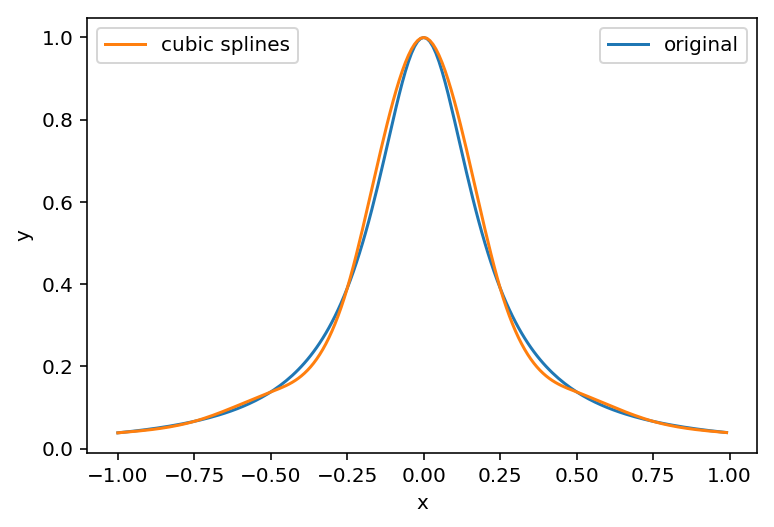

In [15]:
ip=[]
for i in range(len(x_ip)):
    ip.append(splines(vals, x_ip[i]))
print("Cubic Splines: error =", get_error(x_ip, ip))

plt.show()
plt.xlabel("x")
plt.ylabel("y")

#plotting
org, = plt.plot(x_ip,y_ip, label='original')
spl, = plt.plot(x_ip,ip, label='cubic splines')


# Create a legend for the theoretical line.
first_legend = plt.legend(handles=[org], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[spl], loc=2)

The following are errors obtained by different methods: 

$$Lagrange, 1: 0.0543197572232$$
$$Lagrange, 2: 0.0327268857284$$
$$Lagrange, 3: 0.0577723949454$$
$$Lagrange, 4: 0.0310655761838$$
$$Lagrange, 5: 0.0928538193095$$
$$Lagrange, 6: 0.162398756459$$
$$Lagrange, 7: 0.269167308296$$
$$Lagrange, 8: 0.369373342302$$
$$Cubic Splines: 0.020833236494$$


Conclusion: According to the obtained errors, the most precise result is given by the cubic splines method. Then goes the Lagrange interpolation of order 4 and order 2. The worst approximation is Lagrange of order 8, as it oscillates strongly.